In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as npy # linear algebra
import pandas as pds # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen

In [6]:
# Specify important directories
TRAIN_PATH='E:/College/4th year/7th sem/22AIE457 Full Stack Development/End Sem/End SemFER 2013/train'
TEST_PATH='E:/College/4th year/7th sem/22AIE457 Full Stack Development/End Sem/End Sem/FER 2013/test'
train_angry_img_path=TRAIN_PATH +'/angry'

OVERSAMPLED_TRAIN_PATH='E:/College/3rd year/6th sem/Software Engineering/End Sem/FER 2013/fed_oversampled_train'
MODEL_PATH='models'
IMAGE_PATH='images'

# Model Architecture path
def model_arch(model_name):
    !mkdir images
    arch=IMAGE_PATH+'/fer-2013_'+model_name+'.png'
    return arch

#  TensorFlow Checkpoint save_weight uses .ckpt extension format
def checkpoint_path(model_name):
    checkpoint_path = MODEL_PATH+"/fedav_best_model-"+model_name+".ckpt"
    return checkpoint_path

# **Exploratory Data Analysis**

In [8]:
# Load a sample image 
# using open() to open images
#/content/drive/MyDrive/FER2013/train/angry/Training_10118481.jpg
image_data = Image.open(train_angry_img_path+'/Training_10118481.jpg')
image_data

FileNotFoundError: [Errno 2] No such file or directory: 'E:/College/4th year/7th sem/22AIE457 Full Stack Development/End Sem/End SemFER 2013/train/angry/Training_10118481.jpg'

Image shape: (48, 48)
Image data array: [[ 50  32  15 ... 133 151  86]
 [ 57  34  22 ... 138 151  89]
 [ 61  30  24 ... 142 149  89]
 ...
 [103 100 100 ... 149 104  85]
 [107 111 113 ... 151 120  86]
 [104 104 112 ... 143 136  83]]
Image array shape: (48, 48)


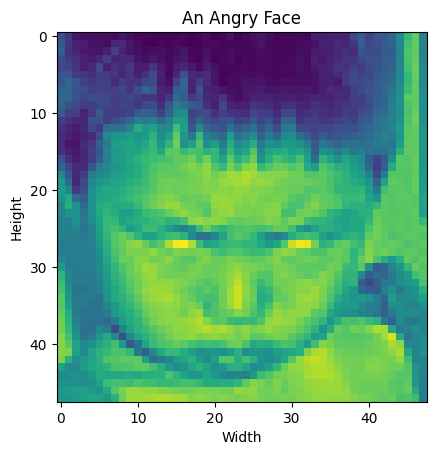

In [5]:
# Get the shape of the image
image=plt.imread(train_angry_img_path+'/Training_10118481.jpg')
print(f'Image shape: {image.shape}')

# Convert image data (like jpeg) to numpy using asarray()
image_array = npy.asarray(image_data)
print(f'Image data array: {image_array}')

# Get the shape of the image array
print(f'Image array shape: {image_array.shape}')

# Printing the image 
plt.imshow(image_array)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('An Angry Face')
plt.show()

In [6]:
# Get the list of folders in the directory as classes
import os
class_dir=os.listdir(TRAIN_PATH+'/')
class_dir

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
# set up file paths and labels
folder_names = class_dir
label_dict = {folder_names[i]:i for i in range(len(folder_names))}
image_filenames = []
labels = []

# iterate through each folder and collect filenames and labels
for folder_name in folder_names:
    folder_path = os.path.join(TRAIN_PATH, folder_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_filenames.append(os.path.join(folder_name, filename))
            labels.append(label_dict[folder_name])

# create pandas dataframe
df = pds.DataFrame({'filename': image_filenames, 'emotion': labels})

# add 'image' column to dataframe
image_array_list = []
for filename in df['filename']:
    img_path = os.path.join(TRAIN_PATH, filename)
    img = Image.open(img_path)
    img_array = npy.array(img).flatten()
    image_array_list.append(img_array)
df['image'] = image_array_list

dfcopy = df.copy()

# strip and replace commas in 'image' column
# df['image'] = df['image'].apply(lambda x: x.strip('[]').replace(',', ' '))

# convert the image column to a string with comma-separated values
df['image'] = df['image'].apply(lambda x: ' '.join(map(str, x.tolist())))

# remove square brackets from the string representation of the array
df['image'] = df['image'].str.replace('[', '').str.replace(']', '')


# Export the preprocessed file to CSV
!mkdir output
df.to_csv('E:\\College\\3rd year\\6th sem\\Software Engineering\\End Sem\\FER 2013fer-2013-images_preprocessed.csv', index=False)

# display dataframe
cm = sns.light_palette("green", as_cmap=True)
df.tail(10).style.background_gradient(cmap=cm, text_color_threshold = 0.1).format(precision=2).highlight_null('red').set_properties(**{'background-color': '#256d7c;', 'color': 'white'}, subset=['filename'])
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11896\1139679446.py:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['image'] = df['image'].str.replace('[', '').str.replace(']', '')
A subdirectory or file output already exists.


,filename,emotion,image
0,angry\Training_10118481.jpg,0,50 32 15 11 12 10 10 8 15 10 7 7 6 5 5 6 8 4 6...
1,angry\Training_10120469.jpg,0,29 24 29 11 15 22 26 11 7 17 29 23 25 37 47 50...
2,angry\Training_10131352.jpg,0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,angry\Training_10161559.jpg,0,155 138 98 112 94 97 111 107 101 84 83 90 86 1...
4,angry\Training_1021836.jpg,0,211 215 220 221 219 216 213 210 207 205 202 20...
...,...,...,...
28704,surprise\Training_99916297.jpg,6,27 26 26 26 27 27 28 28 33 34 35 33 29 31 35 3...
28705,surprise\Training_99924420.jpg,6,7 6 13 39 76 58 29 21 16 20 34 56 70 76 88 96 ...
28706,surprise\Training_99937001.jpg,6,124 129 125 123 129 128 127 128 131 70 73 76 6...
28707,surprise\Training_99951755.jpg,6,242 242 242 216 110 42 20 41 37 14 14 53 36 8 ...


In [8]:
df.emotion.value_counts().unique()

array([7215, 4965, 4830, 4097, 3995, 3171,  436], dtype=int64)

In [9]:
dfcopy

,filename,emotion,image
0,angry\Training_10118481.jpg,0,"[50, 32, 15, 11, 12, 10, 10, 8, 15, 10, 7, 7, ..."
1,angry\Training_10120469.jpg,0,"[29, 24, 29, 11, 15, 22, 26, 11, 7, 17, 29, 23..."
2,angry\Training_10131352.jpg,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,angry\Training_10161559.jpg,0,"[155, 138, 98, 112, 94, 97, 111, 107, 101, 84,..."
4,angry\Training_1021836.jpg,0,"[211, 215, 220, 221, 219, 216, 213, 210, 207, ..."
...,...,...,...
28704,surprise\Training_99916297.jpg,6,"[27, 26, 26, 26, 27, 27, 28, 28, 33, 34, 35, 3..."
28705,surprise\Training_99924420.jpg,6,"[7, 6, 13, 39, 76, 58, 29, 21, 16, 20, 34, 56,..."
28706,surprise\Training_99937001.jpg,6,"[124, 129, 125, 123, 129, 128, 127, 128, 131, ..."
28707,surprise\Training_99951755.jpg,6,"[242, 242, 242, 216, 110, 42, 20, 41, 37, 14, ..."


In [10]:
# dfcopy = df.copy()
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  28709 non-null  object
 1   emotion   28709 non-null  int64 
 2   image     28709 non-null  object
dtypes: int64(1), object(2)
memory usage: 673.0+ KB


In [11]:
# Get dictionary list of image count per class
def class_sample(type):
    if type.lower() == 'test' or type.lower() == 'train':
        path=''
        if type.lower() == 'train':    
            path= TRAIN_PATH
        else:
            path= TEST_PATH
        
        filepath=path+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
    else:
        raise ValueError('Invalid type. Must be "test" or "train".')


def test_train_distribution():
      print("---- Train Set ----")
      avg_train=class_sample('train')[0]/len(class_sample('train')[1])
      print(f'Train class distribution:\n{class_sample("train")[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', class_sample('train')[0])

      print("\n---- Test Set ----")
      avg_test=class_sample('test')[0]/len(class_sample('test')[1])
      print(f'Test class distribution:\n{class_sample("test")[2]}')
      print("Average test class: ",round(avg_test)) 
      print('Total test: ', class_sample('test')[0])


test_train_distribution()

# test_samples=class_sample('test')[0]
# test_batch_size=sorted([int(test_samples/n) for n in range(1,test_samples+1) if test_samples % n ==0 and test_samples/n<=80],reverse=True)[0]  

---- Train Set ----
Train class distribution:
{'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Average train class:  4101
Total train:  28709

---- Test Set ----
Test class distribution:
{'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}
Average test class:  1025
Total test:  7178


# **Data Visualization**

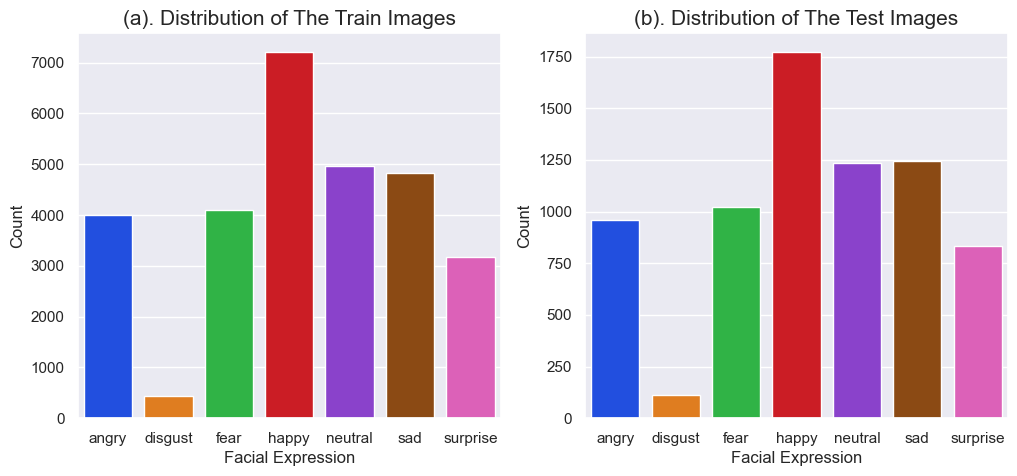

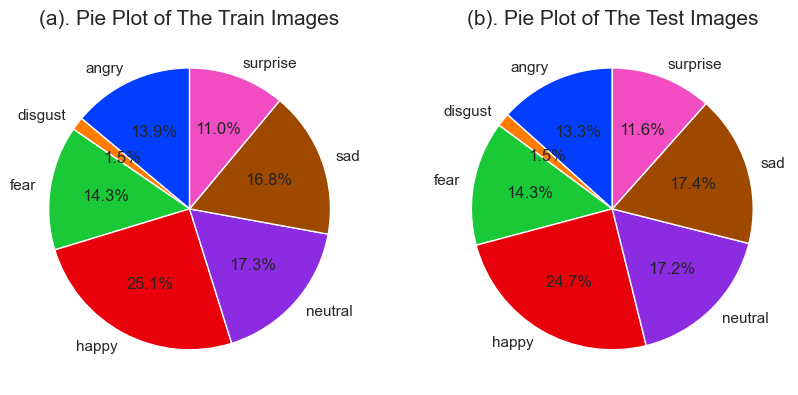

In [12]:
df_train = pds.DataFrame(list(class_sample("train")[2].items()), columns=['Emotion', 'Count'])
df_train.index.name = 'Emotion'
df_test = pds.DataFrame(list(class_sample("test")[2].items()), columns=['Emotion', 'Count'])
df_test.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_train, orient='v', palette='bright')
# set labels and title
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("(a). Distribution of The Train Images", fontsize=15)
# plt.legend( df_train.Emotion, loc='upper left')
# set x-axis tick labels
# axis.set_xticks(range(len(df_train.Emotion)), df_train.Emotion)
# axis.yaxis.set_major_locator(ticker.MultipleLocator(2.5))

plt.subplot(1, 2, 2)
sns.barplot(x='Emotion', y='Count', data=df_test, orient='v', palette='bright')
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("(b). Distribution of The Test Images", fontsize=15)
plt.show()

print('\n\n')

x_train = npy.array([ len(os.listdir(TRAIN_PATH+'/'+class_name+'/')) for class_name in class_dir])
x_test = npy.array([ len(os.listdir(TEST_PATH+'/'+class_name+'/')) for class_name in class_dir])
label = class_dir
  
# plot a Pie plot with vertical orientation
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(x_train, labels=label, colors=palette_color, autopct='%1.1f%%', startangle=90)
ax.set_title('(a). Pie Plot of The Train Images', fontsize=15)

ay = plt.subplot(1, 2, 2)
plt.pie(x_test, labels=label, colors=palette_color, autopct='%1.1f%%', startangle=90)
ay.set_title('(b). Pie Plot of The Test Images', fontsize=15)
plt.show()

# **Data Preprocessing**

**Oversampling**

In [13]:
# Oversampling Technique
import os
from PIL import Image

# Define the paths to the original and oversampled dataset
train_dir = TRAIN_PATH
oversampled_dir = OVERSAMPLED_TRAIN_PATH

target_length = 7215 # Using the highest count 
# target_length = 4101 # Using the average 

if not os.path.exists(oversampled_dir):
    os.mkdir(oversampled_dir)

for subfolder in os.listdir(train_dir):
    subfolder_path = os.path.join(train_dir, subfolder)
    if os.path.isdir(subfolder_path):
        num_images = len(os.listdir(subfolder_path))
        num_duplicates = target_length // num_images
        remainder = target_length % num_images

        for i in range(num_duplicates):
            for image_file in os.listdir(subfolder_path):
                image_path = os.path.join(subfolder_path, image_file)
                image = Image.open(image_path)
                new_image_file = f"{i}_{image_file}"
                new_image_path = os.path.join(oversampled_dir, subfolder, new_image_file)
                if not os.path.exists(os.path.join(oversampled_dir, subfolder)):
                    os.mkdir(os.path.join(oversampled_dir, subfolder))
                image.save(new_image_path)

        if remainder != 0:
            for image_file in os.listdir(subfolder_path)[:remainder]:
                image_path = os.path.join(subfolder_path, image_file)
                image = Image.open(image_path)
                new_image_file = f"{num_duplicates}_{image_file}"
                new_image_path = os.path.join(oversampled_dir, subfolder, new_image_file)
                if not os.path.exists(os.path.join(oversampled_dir, subfolder)):
                    os.mkdir(os.path.join(oversampled_dir, subfolder))
                image.save(new_image_path)

In [14]:
# Get dictionary list of image count per class
def over_class_sample():
        filepath=OVERSAMPLED_TRAIN_PATH+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict

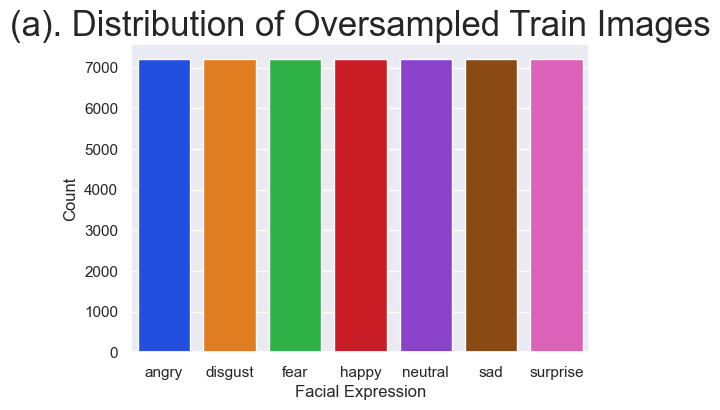


---- Oversampled Train Set ----
Train class distribution:
{'angry': 7215, 'disgust': 7215, 'fear': 7215, 'happy': 7215, 'neutral': 7215, 'sad': 7215, 'surprise': 7215}
Average train class:  7215
Total train:  50505


In [15]:
df_overtrain = pds.DataFrame(list(over_class_sample()[2].items()), columns=['Emotion', 'Count'])
df_overtrain.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_overtrain, orient='v', palette='bright')
# set labels and title
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("(a). Distribution of Oversampled Train Images", fontsize=25)
plt.show()

def test_train_distribution():
      print("\n---- Oversampled Train Set ----")
      avg_train=over_class_sample()[0]/len(over_class_sample()[1])
      print(f'Train class distribution:\n{over_class_sample()[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', over_class_sample()[0])



test_train_distribution()

**Data Augmentation**

In [16]:
#Definnig a function to do so 
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    # image = tf.image.grayscale_to_rgb(tf.convert_to_tensor(image))
    image = tf.image.resize(tf.convert_to_tensor(image), size)
    return image

In [17]:
target_size=(48, 48)
# target_size=(224, 224)
batch_size=32

## Train Image Data Generator instance. 
# We will not apply any transformon specific orientations or features and no initial rescale to the image
# We'll only split the image data into train and validation set
trainValidation_data_generator = ImgDataGen(
                                            # rescale=1./225,
                                            rotation_range=10,  # Randomly rotate images by up to 10 degrees
                                            zoom_range=0.2,  # Randomly zoom images by up to 20%
                                            width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the image width
                                            height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the image height
                                            shear_range=0.2,  # Randomly apply shearing transformations
                                            horizontal_flip=True,  # Randomly flip images horizontally
                                            fill_mode='nearest',  # Fill in missing pixels with the nearest value
                                            # preprocessing_function=grayscale_RGB_and_upsizing,
                                            validation_split=0.2    # set the validation split                                
                                            )

# Test Image Data Generator instance for Test data
validation_data_generator = ImgDataGen(
                                    validation_split=0.14,
                                    )

# Test Image Data Generator instance for Test data
test_data_generator = ImgDataGen(
                                # rescale = 1./255,
                                )

# Set a random seed to synchronize the shuffle order across different runs of the generator
# trainValidation_data_generator.set_seed(42)

# **Create Train, Validation, and Test Generators**

In [18]:
# Here, I will only be rescaling. No other transformations are applies, to preserve originality of the images.

classes = ['angry', 'fear', 'surprise', 'sad', 'disgust', 'happy', 'neutral']

## Mapping images to their classes.
print('Train Set Generated - ',end=' ') 
train_generator = trainValidation_data_generator.flow_from_directory(
                                                            directory=OVERSAMPLED_TRAIN_PATH, 
                                                            # directory=TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes=classes,
                                                            shuffle=True, 
                                                            subset='training' # set as training data
                                                        )
## Mapping images to their classes.
print('Validation Set Generated - ',end=' ') 
validation_generator = trainValidation_data_generator.flow_from_directory(
                                                            # directory=TRAIN_PATH, 
                                                            directory=OVERSAMPLED_TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes= classes,
                                                            shuffle=False, 
                                                            subset='validation' # set as validation data
                                                        )
test_samples=class_sample('test')[0]
test_batch_size=batch_size
test_steps=int(test_samples/test_batch_size)

## Mapping images to their classes.
print('Test Set Generated - ',end=' ') 
test_generator = test_data_generator.flow_from_directory(
                                        directory=TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=False, 
                                        batch_size=test_batch_size
                                        )

## Mapping shuffled images to their classes.
print('Shuffled Test Set Generated - ',end=' ') 
test_generator_shuffled = test_data_generator.flow_from_directory(
                                        TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=True, 
                                        batch_size=test_batch_size
                                        )

Train Set Generated -  Found 40404 images belonging to 7 classes.
Validation Set Generated -  Found 10101 images belonging to 7 classes.
Test Set Generated -  Found 7178 images belonging to 7 classes.
Shuffled Test Set Generated -  Found 7178 images belonging to 7 classes.


# **More on Data Analysis**

In [19]:
# From the generator we can get information we will need later
# classes=  # os.listdir(TRAIN_PATH+'/')
class_dictionary = train_generator.class_indices
class_keys = list(train_generator.class_indices.keys())
class_values = list(train_generator.class_indices.values())
class_count = len(class_keys)

print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)
test_images, test_labels = next(test_generator)

print(f'\nThere are 7 classes: {classes}')
print(f'The class dictionary are: {class_dictionary}')
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)
print('\nX_test shape: ', test_images.shape)
print('y_test shape: ', test_labels.shape)

print('\ntrain_generator sample: ', train_generator.samples)
print('validation_generator sample: ', validation_generator.samples)
print('test_generator sample: ', test_generator.samples)

print('\ntrain_generator sample: ', train_generator.labels)
print('validation_generator sample: ', validation_generator.labels)
print('test_generator sample: ', test_generator.labels)

test batch size:  32   test steps:  224  number of classes :  7

There are 7 classes: ['angry', 'fear', 'surprise', 'sad', 'disgust', 'happy', 'neutral']
The class dictionary are: {'angry': 0, 'fear': 1, 'surprise': 2, 'sad': 3, 'disgust': 4, 'happy': 5, 'neutral': 6}
Class count:  7

X_train shape:  (32, 48, 48, 3)
y_train shape:  (32, 7)

X_test shape:  (32, 48, 48, 3)
y_test shape:  (32, 7)

train_generator sample:  40404
validation_generator sample:  10101
test_generator sample:  7178

train_generator sample:  [0 0 0 ... 6 6 6]
validation_generator sample:  [0 0 0 ... 6 6 6]
test_generator sample:  [0 0 0 ... 6 6 6]


In [20]:
class_indices = train_generator.class_indices
class_counts = {class_name: 0 for class_name in class_indices}
num_images = train_generator.samples

batch_size = train_generator.batch_size
num_batches = len(train_generator)

for i in range(num_batches):
    batch = next(train_generator)
    images, labels = batch
    for j in range(len(labels)):
        label = npy.argmax(labels[j])  # convert one-hot encoding to integer label
        class_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        class_counts[class_name] += 1

print(class_counts)
print(f"Total number of images in train generator: {num_images}")

{'angry': 5772, 'fear': 5775, 'surprise': 5772, 'sad': 5771, 'disgust': 5768, 'happy': 5774, 'neutral': 5772}
Total number of images in train generator: 40404


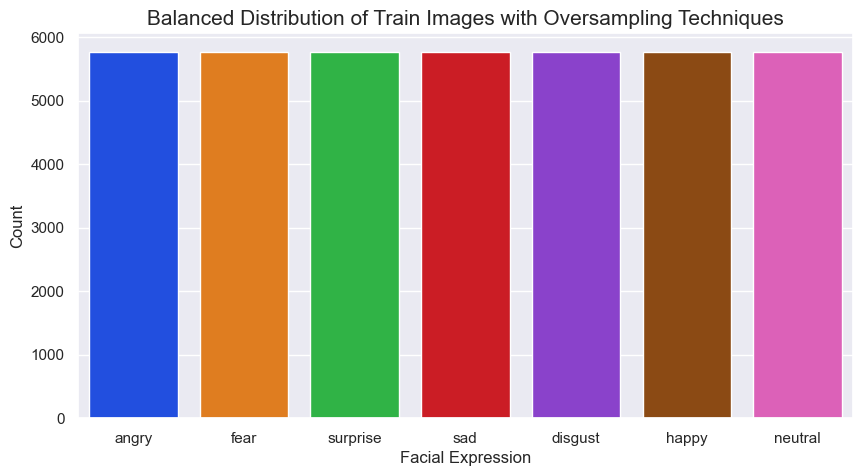

In [21]:
df_train_gen = pds.DataFrame(list(class_counts.items()), columns=['Emotion', 'Count'])
df_train_gen.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(10, 5))
sns.barplot(x='Emotion', y='Count', data=df_train_gen, orient='v', palette='bright')
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Balanced Distribution of Train Images with Oversampling Techniques", fontsize=15)
plt.show()

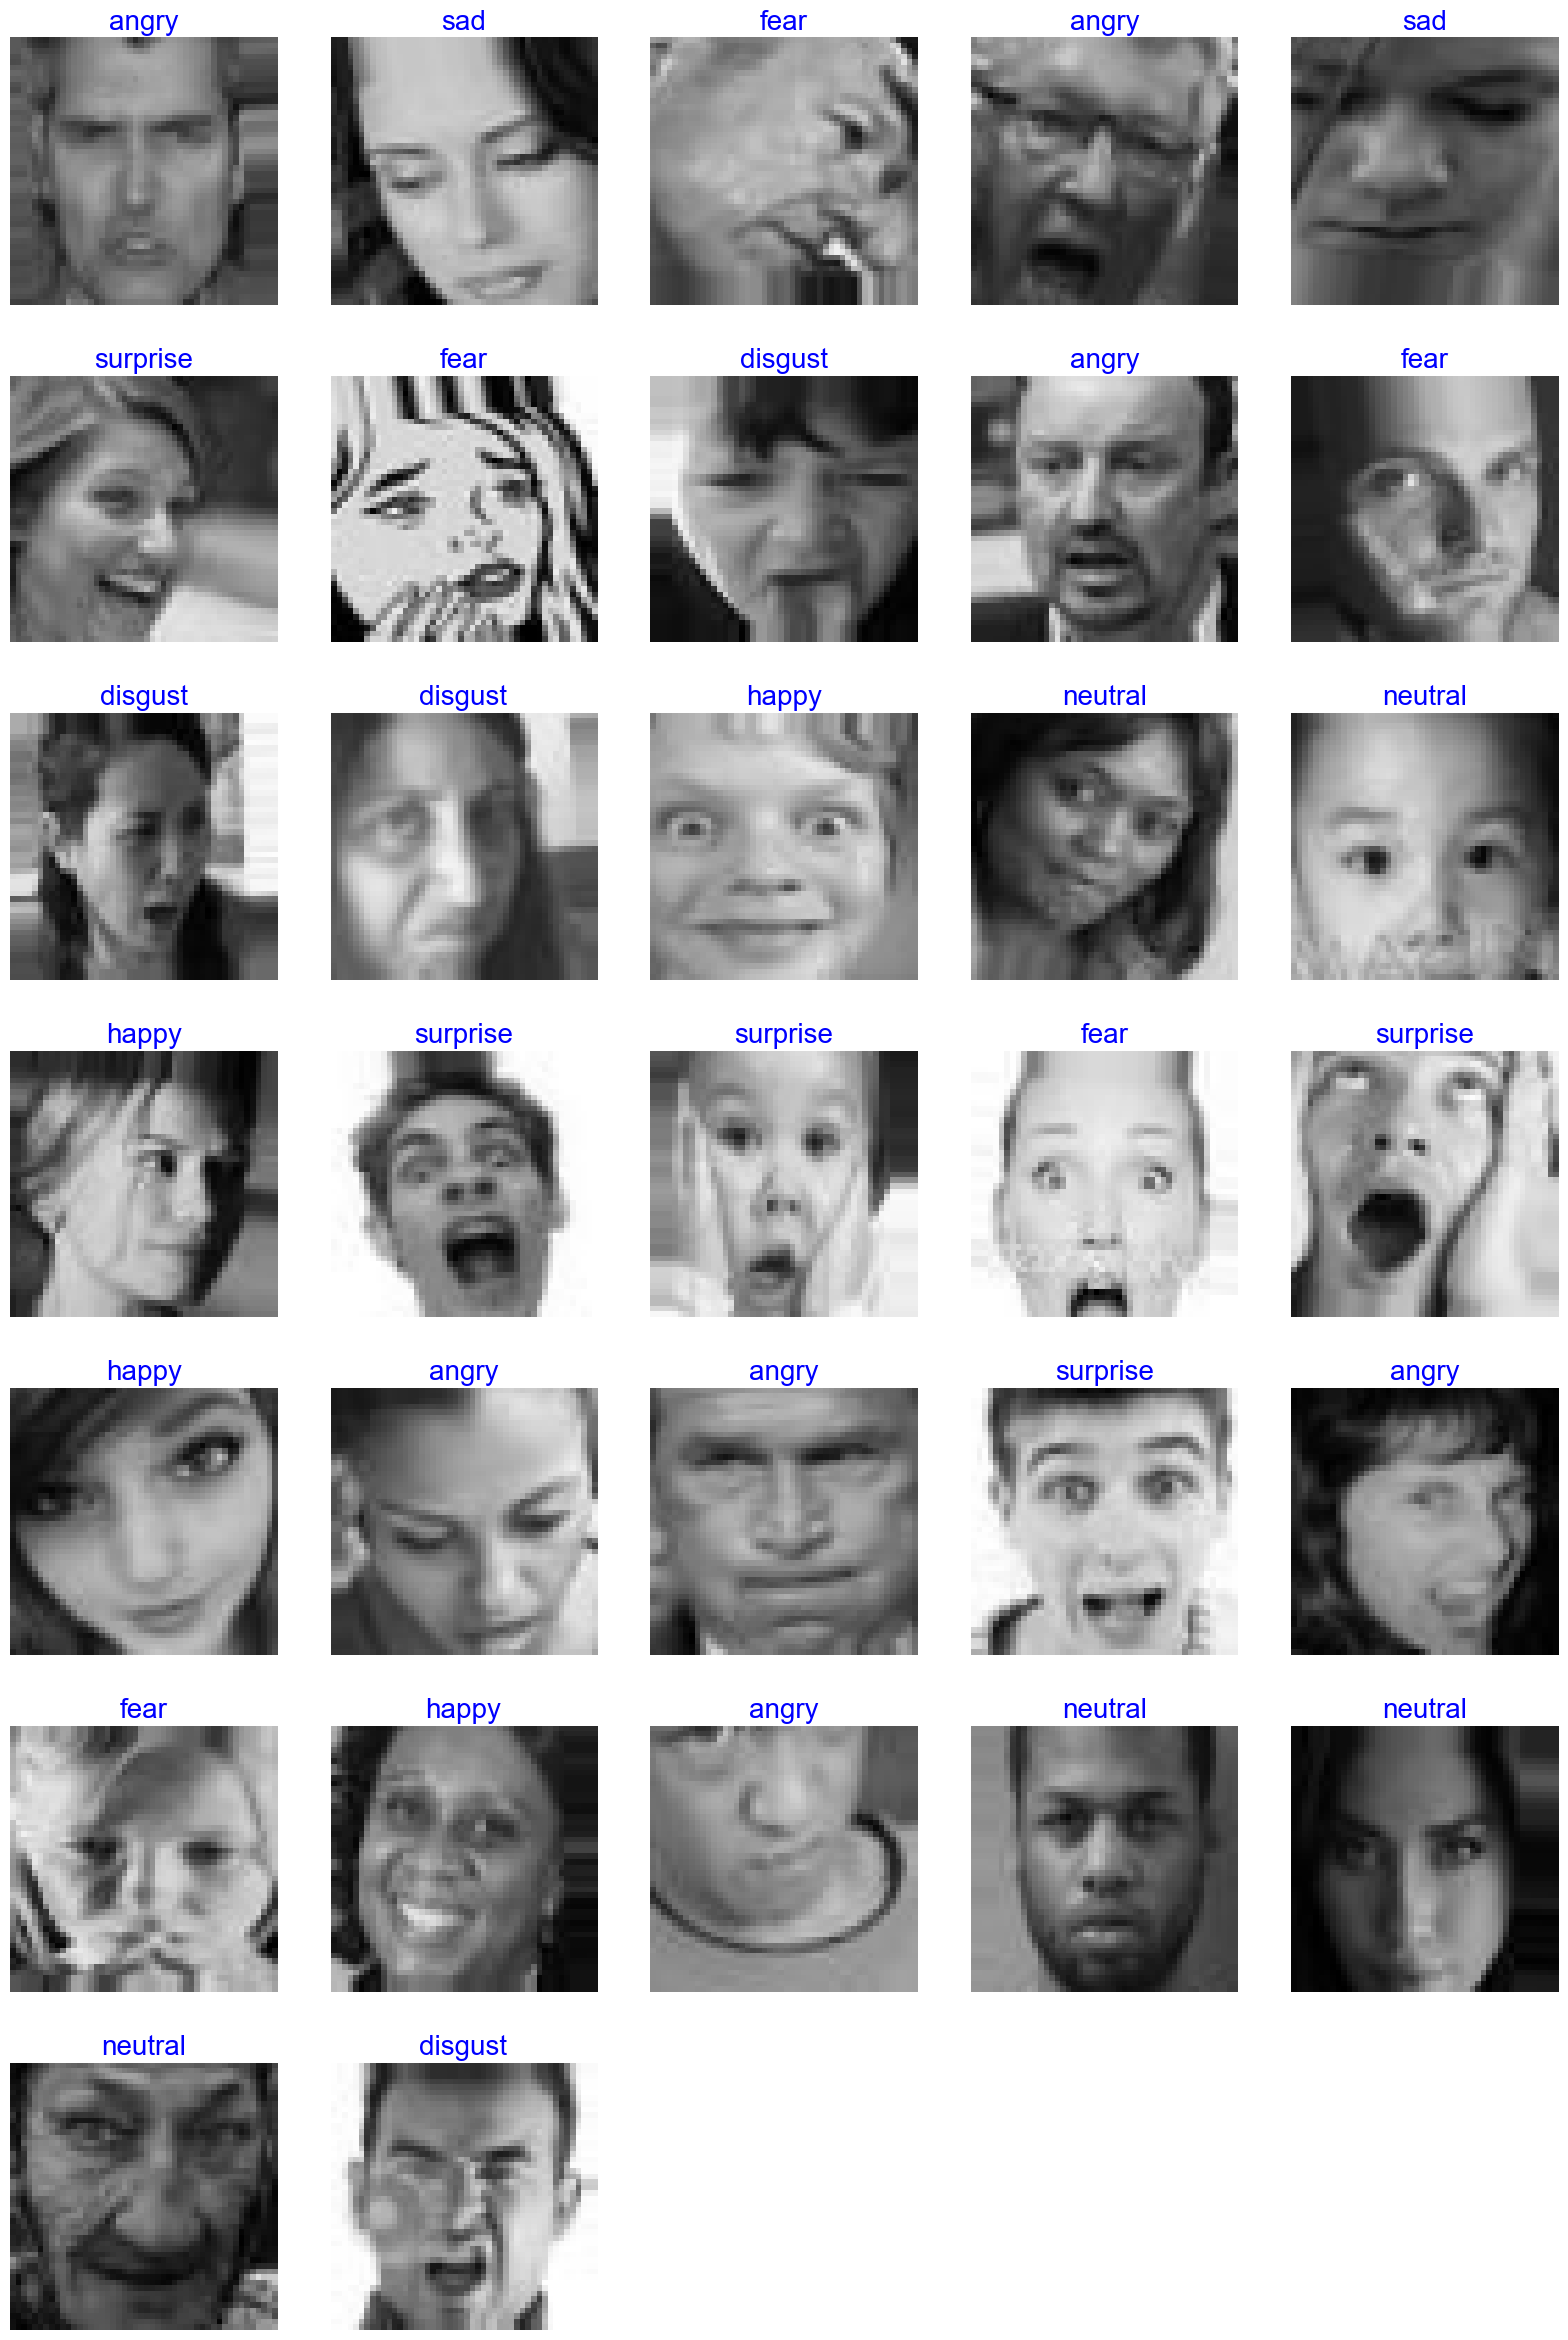

In [22]:
# Get the sample images, labels, and their filenames 
# To get the correct filename, turn off the shuffle
def plotImageWithNames(gen):
    images, labels = next(gen)
    filenames = gen.filenames
    classes = list(gen.class_indices.keys())
    
    plt.figure(figsize=(20, 30))
    length=len(labels)
    if length<32:  
        r=length
    else:
        r=32
    for i in range(r):        
        plt.subplot(7, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=npy.argmax(labels[i])
        class_name=classes[index]
        filename=gen.filenames[i]
        plt.title(
                    label=f"{class_name}", # \n{filename} ", 
                    color='blue', 
                    fontsize=20
                    )
        plt.axis('off')
    plt.show()

plotImageWithNames(train_generator)

# **Model Developmnet**

In [23]:
from tensorflow import keras
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers, optimizers, metrics, regularizers, models
from tensorflow.keras.optimizers import Adam, Adamax
# from tensorflow.keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy

In [24]:
# define the image shape for the input layer
input_shape=(target_size[0], target_size[1], 3)
batch_size = batch_size
epochs=100
ask_epoch=40

# **Model Building and Compiling**

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(
                                                            include_top=False, 
                                                            weights="imagenet",
                                                            input_shape=input_shape, 
                                                            pooling='max'
                                                            ) 

# Let's make our base_model trainable to get better results
base_model.trainable=True
x=base_model.output

x=BatchNormalization(
                    axis=-1, 
                    momentum=0.99, 
                    epsilon=0.001,
                    name='batch_norm_x' 
                    )(x)
x = Dense(
          256, 
          kernel_regularizer = regularizers.l2(l = 0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006),
          activation='relu',
          name='dense_x'
          )(x)

x=Dropout(
          rate=.4, 
          seed=123,
          name='dropout_x'
          )(x) 
      
output=Dense(
            class_count, 
            activation='softmax',
            name='dense_output'
            )(x)
cnn_model=Model(inputs=base_model.input, outputs=output, name=model_name)
learning_rate=.001 # start with this learning rate
cnn_model.compile(
                  Adamax(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy']
                  )

# View the model summary
cnn_model.summary()

Model: "EfficientNetB3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 48, 48, 3)    0           ['normalization[0][0]']          
                                                                                     

In [26]:
# Plot the Model Diagram
set_config(display="diagram")
from keras.utils.vis_utils import plot_model
plot_model(cnn_model, to_file=model_arch(model_name), show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


A subdirectory or file images already exists.


# **Create a Custom Keras Callback to Continue or Halt Training**

In [27]:
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.subask_epoch = int(ask_epoch/2)
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou earlier specified a maximum epochs of ', self.epochs, '\n, its seems that you want to train for a total of', self.ask_epoch,'\n\n Please confirm your action, please enter "Y", or "N" to end training at ', self.epochs)
                        ans=input()
                        
                        if ans == 'Y' or ans =='y':
                            self.epochs = self.ask_epoch
                        else:
                             print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)
                        
ask=ASK(cnn_model, epochs,  ask_epoch)

# **Checkpoint Callback**

**Checkpoint 1: Save Weight Only**

Creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch.

As long as two models share the same architecture, the weights between them can be shared. So, when restoring a model from weights-only, create a model with the same architecture as the original model and then set its weights.

In [28]:
# starting the Checkpoint for the model
# checkpoint_dir = os.path.dirname(checkpoint_path)

check_point = tf.keras.callbacks.ModelCheckpoint(
                                          filepath=checkpoint_path(model_name),
                                          save_weights_only=True,
                                          save_best_only=True, 
                                          monitor="val_accuracy",
                                          verbose = 1,
                                        )

reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            # factor=0.5, 
                                            patience=2,
                                            verbose=1
                                            )

early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

callbacks = [
            check_point,
            reduce_learning, 
            early_stop, 
            ask
          ]

**Checkpoint 2: Save Entire Model**

In [29]:
# starting the Checkpoint for the model
e_checkpoint_path = "E:\\College\\3rd year\\6th sem\\Software Engineering\\End Sem\\FER 2013\\model\\fedav_best_model.h5"
checkpoint_dir = os.path.dirname(e_checkpoint_path)

e_check_point = tf.keras.callbacks.ModelCheckpoint(
                                          filepath=e_checkpoint_path,
                                          save_weights_only=True,
                                          save_best_only=True, 
                                          monitor="val_accuracy",
                                          verbose = 1,
                                        )

e_reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            # factor=0.5, 
                                            patience=2,
                                            verbose=1
                                            )

e_early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

e_callbacks = [
#             e_check_point,
            e_reduce_learning, 
            e_early_stop, 
            ask
          ]

# **Model Training**

In [30]:
import time
model_history=cnn_model.fit(
                  train_generator,  
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  epochs=epochs, 
                  verbose=1, 
                  callbacks=callbacks,  
                  validation_data=validation_generator,
                #   validation_steps=None, 
                  validation_steps= validation_generator.n//validation_generator.batch_size,
                  )

Training will proceed until epoch 40  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/100
1262/1262 [==============================] - ETA: 0s - loss: 4.9360 - accuracy: 0.3058
Epoch 1: val_accuracy improved from -inf to 0.41022, saving model to models\fedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 1314s 1s/step - loss: 4.9360 - accuracy: 0.3058 - val_loss: 2.3633 - val_accuracy: 0.4102 - lr: 0.0010
Epoch 2/100
1262/1262 [==============================] - ETA: 0s - loss: 1.8214 - accuracy: 0.4664
Epoch 2: val_accuracy improved from 0.41022 to 0.53442, saving model to models\fedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 1180s 935ms/step - loss: 1.8214 - accuracy: 0.4664 - val_loss: 1.4485 - val_accuracy: 0.5344 - lr: 0.0010
Epoch 3/100
1262/1262 [==============================] - ETA: 0s - loss: 1.4348 - accuracy: 0.5345
Epoch 3: val_

# **Accuracy and Loss Function Graph**

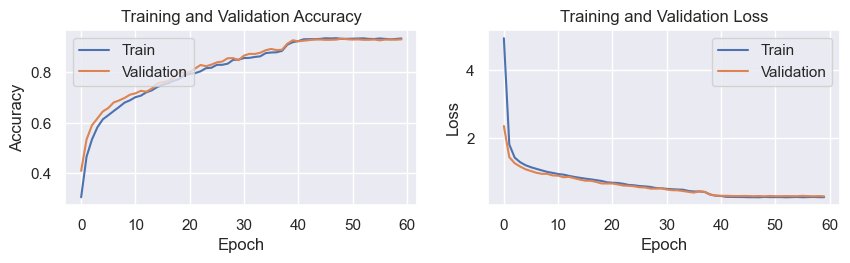

In [31]:
from pylab import rcParams
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
start_epoch = 0
Epoch_count=len(acc)+ start_epoch
Epochs=[]
for i in range (start_epoch ,Epoch_count):
    Epochs.append(i+1)   
index_loss=npy.argmin(val_loss)   #   this is the epoch with the lowest validation loss
val_lowest=val_loss[index_loss]
index_acc=npy.argmax(val_acc)


# summarize history for accuracy using reLU
sns.set()
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')




# summarize history for loss using reLU
plt.subplot(2, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

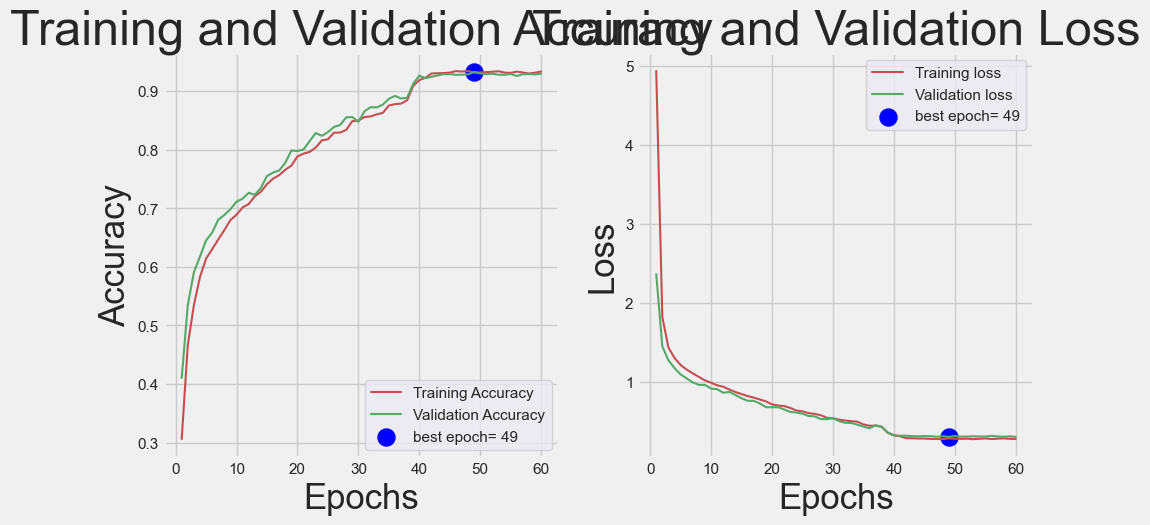

In [32]:
def trainValPlot(tr_data, start_epoch):
    # Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=npy.argmin(vloss)   #   this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=npy.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    sns.set()
    axes[0].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[0].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[0].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[0].set_title('Training and Validation Accuracy', fontsize=35)
    axes[0].set_xlabel('Epochs', fontsize=25)
    axes[0].set_ylabel('Accuracy', fontsize=25)
    axes[0].legend()
    axes[1].plot(Epochs,tloss, 'r', label='Training loss')
    axes[1].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[1].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[1].set_title('Training and Validation Loss', fontsize=35)
    axes[1].set_xlabel('Epochs', fontsize=25)
    axes[1].set_ylabel('Loss', fontsize=25)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
trainValPlot(model_history,0)

# **Model Evaluation**

In [2]:
# Rebuild a fresh, untrained model and evaluate it on the test set. 
# An untrained model will perform at chance levels (~10% accuracy)
# Create a basic model instance
model = cnn_model

# Evaluate the model
loss, acc = model.evaluate(train_generator, verbose=2)

NameError: name 'cnn_model' is not defined

In [35]:
# Rebuild a fresh, untrained model and evaluate it on the test set. 
# An untrained model will perform at chance levels (~10% accuracy)
# Create a basic model instance
model = cnn_model

# Evaluate the model
loss, acc = model.evaluate(validation_generator, verbose=2)

316/316 - 55s - loss: 0.3049 - accuracy: 0.9313 - 55s/epoch - 174ms/step


In [36]:
# Loads the weights
cnn_model.load_weights(checkpoint_path(model_name=model_name))

# Re-evaluate the model
loss, acc = cnn_model.evaluate(validation_generator, verbose=2)
print("Restored model, validation accuracy: {:5.2f}%".format(100 * acc))

316/316 - 83s - loss: 0.3046 - accuracy: 0.9330 - 83s/epoch - 261ms/step
Restored model, validation accuracy: 93.30%


In [37]:
# Loads the weights
cnn_model.load_weights(checkpoint_path(model_name))

# Re-evaluate the model
loss, acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy on New Test data: {:5.2f}%".format(100 * acc))

1/1 - 0s - loss: 1.2664 - accuracy: 0.7188 - 188ms/epoch - 188ms/step
Restored model, accuracy on New Test data: 71.88%


# **Prediction on Test Images**

In [38]:
def ModelPredictionOnTestDataset(test_generator=test_generator):
#     test_steps= test_generator.n//test_generator.batch_size
    y_pred= []
    y_label=test_generator.labels
    classes=list(train_generator.class_indices.keys())
    class_count=len(classes)
    wrong_predictions=0
    
    # predict on the test set
    preds=cnn_model.predict(test_generator, test_steps, verbose=1) 
    
    total_predictions=len(preds)
    print(f'total prediction: {total_predictions}')
    for i, p in enumerate(preds):
            pred_index=npy.argmax(p)  
            # labels are integer values       
            true_index=test_generator.labels[i]  
            if pred_index != true_index:       
                # a misclassification has occurred                                     
                wrong_predictions=wrong_predictions + 1
            y_pred.append(pred_index)
    acc=( 1-wrong_predictions/total_predictions) * 100
    print(f'\n{wrong_predictions} out of {total_predictions} tested images could not be detected properly.\nAccuracy of {acc:6.2f}\n')
    ypred=npy.array(y_pred)
    ytrue=npy.array(y_label)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(8, 4))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(npy.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(npy.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data", fontsize=40)
        plt.show()
    clr = classification_report(y_label, y_pred, target_names=classes, digits= 5) # create classification report
    print("Classification Report on Validation Data:\n-------------------------------------\n", clr)
        
    return wrong_predictions, total_predictions

316/316 [==============================] - 78s 239ms/step
total prediction: 10101

711 out of 10101 tested images could not be detected properly.
Accuracy of  92.96



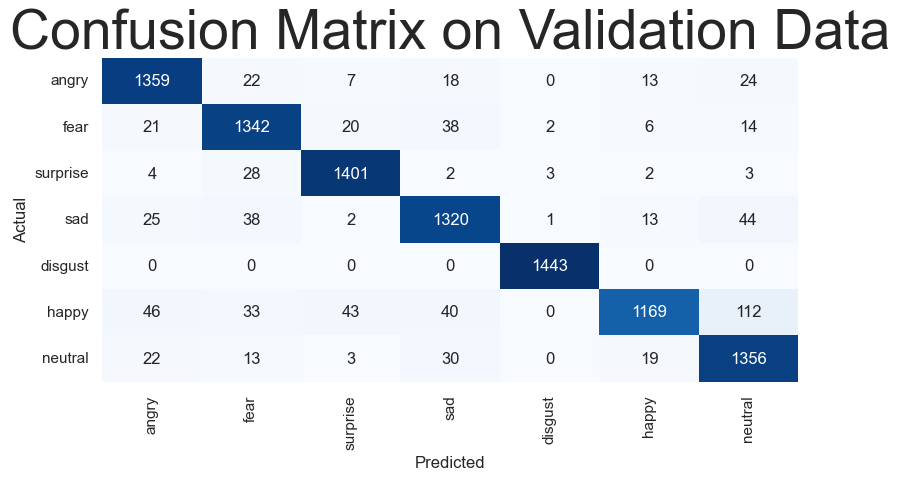

Classification Report on Validation Data:
-------------------------------------
               precision    recall  f1-score   support

       angry    0.92011   0.94179   0.93082      1443
        fear    0.90921   0.93001   0.91949      1443
    surprise    0.94919   0.97089   0.95992      1443
         sad    0.91160   0.91476   0.91318      1443
     disgust    0.99586   1.00000   0.99793      1443
       happy    0.95663   0.81012   0.87730      1443
     neutral    0.87315   0.93971   0.90521      1443

    accuracy                        0.92961     10101
   macro avg    0.93082   0.92961   0.92912     10101
weighted avg    0.93082   0.92961   0.92912     10101



In [39]:
# Validation
wrong_predictions, total_predictions = ModelPredictionOnTestDataset(validation_generator)

# **Print Predicted Images: Shuffled Test Set**

In [1]:
test_images, test_labels = next(test_generator_shuffled)
preds = cnn_model.predict(test_images)
# print(preds)
idx = npy.argmax(preds, axis = 1)
# test_labels = test_labels.astype(int)
test_labels = npy.argmax(test_labels, axis = 1)
idx = idx.reshape((-1, 1))
test_labels = npy.reshape(test_labels, (len(test_labels), 1))
# print()
print('correct prediction:', npy.sum((test_labels == idx)*1)/test_batch_size)


def compare(idx, train_generator):
    class_dictionary = train_generator.class_indices
    for key, value in class_dictionary.items():
        if value == idx:
             return key

def dif(test_labels, idx, train_generator):    
    class_dictionary = train_generator.class_indices
    test = ''
    id = ''
    for key, value in class_dictionary.items():
        if value == test_labels:
            test = key
        if value == idx:
            id = key
    return test, id


#Code by Hitesh Kumar https://www.kaggle.com/hitzz97/emotion-detection

fig = plt.figure(figsize=((20, 30)))

# k = 0
for j in range(len(idx)):
    ax = plt.subplot(7, 5, j+1)
    px = test_images[j]/255
#     k += 1
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    
#     print(idx[j])
#     print(test_labels[j])
    if test_labels[j] == idx[j]:
#     if  class_dictionary[test_labels[j]] == class_dictionary[idx[j]]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('green')
        ax.set_title(
                    compare(idx[j], train_generator),
                    color='green', 
                    fontsize=40
                     )

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('red')
        ax.set_title(
                    'Pred:'+dif(test_labels[j], idx[j], train_generator)[1]+" | Act:"+ dif(test_labels[j], idx[j], train_generator)[0],
                    color='red', 
                    fontsize=40
                    )
    plt.tight_layout()

NameError: name 'test_generator_shuffled' is not defined

In [42]:
model.save('model.h5')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.